In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%load_ext memory_profiler

# <center>Laboratorium Całki<br>Metody Numeryczne</center>

# Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z metodami całkowania numerycznego funkcji:  
$$
\int\limits_{a}^{b}f(x)dx 
$$  

Dana jest funkcja $f(x)$, należy wyznaczyć wartość całki tej funkcji na przedziale $a$,$b$.


***Zadanie 1.***    
Wyznacz numerycznie wartość całki:   
$$
\int\limits_{a}^{b}\sin^2(\cfrac{1}{x-1.01})dx 
$$

Wykonaj następujące czynności:

1. Czy możliwe jest całkowanie podanej funkcji na dowolnym przedziale? Swoją odpowiedź uzasadnij.
2. Oblicz całkę numerycznie na przedziale $a =0$, $b=1$ przy pomocy następujących metod:  
    1. Metoda Prostokątów
    2. Metoda Trapezów - [trapezoid](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapezoid.html#scipy.integrate.trapezoid)
    3. Metoda Kwadratur - [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad)  
  
Sprawdź jak wyniki róźnią się od siebie, czy ma na nie wpływ długość wektora $\mathbf{y}$ oraz wartość parametru $dx$

3. Porównaj wyniki i czas obliczeń z punktu 1 z funkcjami:
    1. [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad)
    2. [quadrature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html#scipy.integrate.quadrature)

Całkowanie tej funkcji nie jest możliwe jedynie w okolicy punktu x = 1.01, ponieważ w tym punkcie występują bardzo gęste oscylacje utrudniające obliczenie numeryczne tej całki.

In [2]:
def rectangle_method(f, a, b, domain, dx):
    result_rectangles = 0
    for x in domain:
        result_rectangles += f(x)*dx
    return result_rectangles

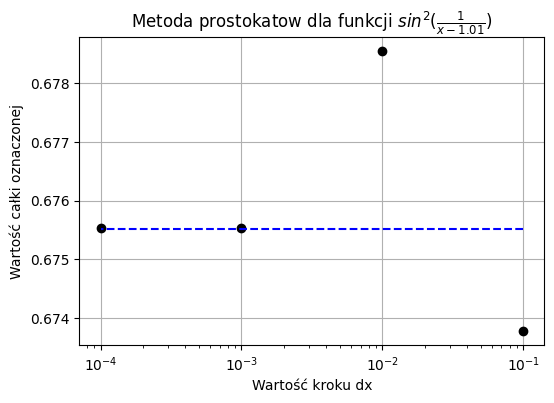

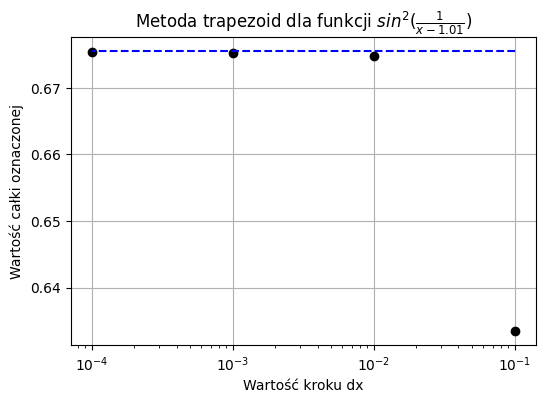

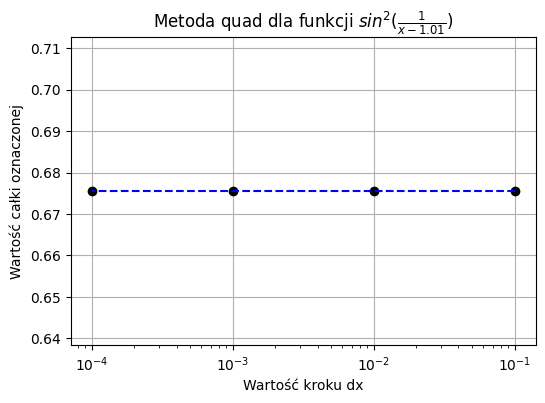

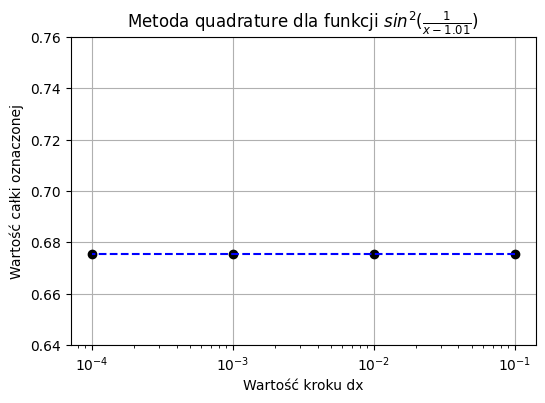

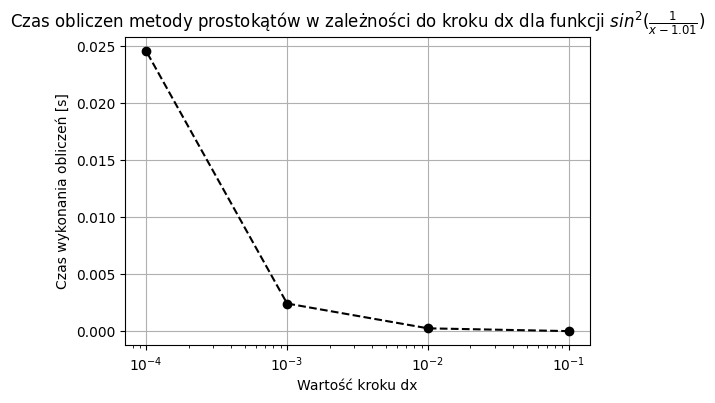

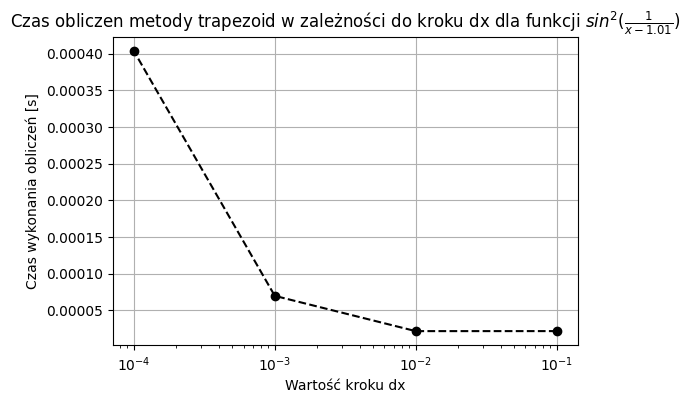

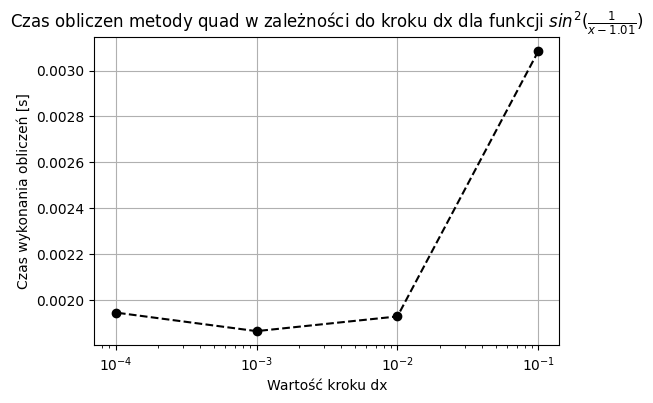

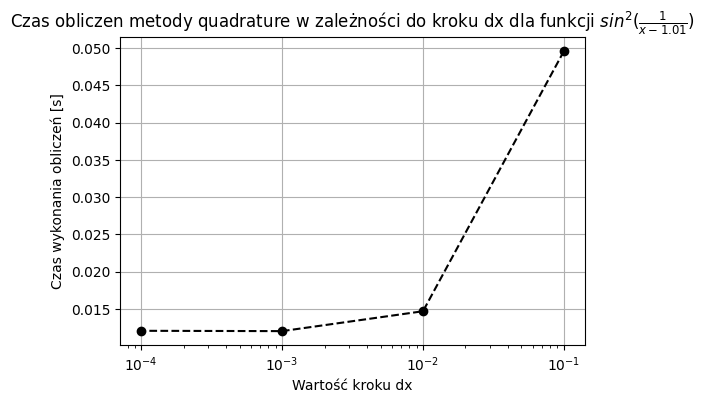

In [3]:
a = 0
b = 1
dx_vector = [10**-i for i in range(1, 5)]
f = lambda x: np.power(np.sin(1/(x-1.01)), 2)

estimated_value, err = sp.integrate.quad(f, a, b)
estimated_values = [estimated_value for _ in range(len(dx_vector))]

results_rectangle = []
results_trapezoid = []
results_quad = []
results_quadrature = []

times_rectangle = []
times_trapezoid = []
times_quad = []
times_quadrature = []

for dx in dx_vector:

    domain = np.arange(a, b, dx)

    # metoda prostokatow
    time = %timeit -r 5 -n 5 -o -q rectangle_method(f, a, b, domain, dx)
    times_rectangle.append(time.average)
    result_rectangle = rectangle_method(f, a, b, domain, dx)
    results_rectangle.append(result_rectangle)

    # trapezoid
    time = %timeit -r 5 -n 5 -o -q sp.integrate.trapezoid(f(domain), x=domain, dx=dx)
    times_trapezoid.append(time.average)
    result_trapezoid = sp.integrate.trapezoid(f(domain), x=domain, dx=dx)
    results_trapezoid.append(result_trapezoid)

    # quad
    time = %timeit -r 5 -n 5 -o -q sp.integrate.quad(f, a, b)
    times_quad.append(time.average)
    result_quad, error_quad = sp.integrate.quad(f, a, b)
    results_quad.append(result_quad)

    # quadrature
    time = %timeit -r 5 -n 5 -o -q sp.integrate.quadrature(f, a, b, maxiter=5000)
    times_quadrature.append(time.average)
    result_quadrature, error_quadrature = sp.integrate.quadrature(f, a, b, maxiter=5000)
    results_quadrature.append(result_quadrature)

plt.figure(figsize=(6,4))
plt.plot(dx_vector, results_rectangle, 'ko')
plt.plot(dx_vector, estimated_values, 'b--')
plt.grid()
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Wartość całki oznaczonej')
plt.title('Metoda prostokatow dla funkcji $sin^2(\\frac{1}{x-1.01})$')
plt.semilogx()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dx_vector, results_trapezoid, 'ko')
plt.plot(dx_vector, estimated_values, 'b--')
plt.grid()
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Wartość całki oznaczonej')
plt.title('Metoda trapezoid dla funkcji $sin^2(\\frac{1}{x-1.01})$')
plt.semilogx()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dx_vector, results_quad, 'ko')
plt.plot(dx_vector, estimated_values, 'b--')
plt.grid()
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Wartość całki oznaczonej')
plt.title('Metoda quad dla funkcji $sin^2(\\frac{1}{x-1.01})$')
plt.semilogx()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dx_vector, results_quadrature, 'ko')
plt.plot(dx_vector, estimated_values, 'b--')
plt.grid()
plt.ylim((0.64, 0.76))
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Wartość całki oznaczonej')
plt.title('Metoda quadrature dla funkcji $sin^2(\\frac{1}{x-1.01})$')
plt.semilogx()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dx_vector, times_rectangle, 'ko--')
plt.grid()
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Czas wykonania obliczeń [s]')
plt.title('Czas obliczen metody prostokątów w zależności do kroku dx dla funkcji $sin^2(\\frac{1}{x-1.01})$')
plt.semilogx()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dx_vector, times_trapezoid, 'ko--')
plt.grid()
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Czas wykonania obliczeń [s]')
plt.title('Czas obliczen metody trapezoid w zależności do kroku dx dla funkcji $sin^2(\\frac{1}{x-1.01})$')
plt.semilogx()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dx_vector, times_quad, 'ko--')
plt.grid()
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Czas wykonania obliczeń [s]')
plt.title('Czas obliczen metody quad w zależności do kroku dx dla funkcji $sin^2(\\frac{1}{x-1.01})$')
plt.semilogx()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dx_vector, times_quadrature, 'ko--')
plt.grid()
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Czas wykonania obliczeń [s]')
plt.title('Czas obliczen metody quadrature w zależności do kroku dx dla funkcji $sin^2(\\frac{1}{x-1.01})$')
plt.semilogx()
plt.show()

***Zadanie 2.***  
Dla funkcji 

$$f(x) = e^{-x^2}$$

wyznacz numerycznie wartośc całki na przedziale $a = 0$, $b=1$  w  taki sam sposób jak w zadaniu 1.

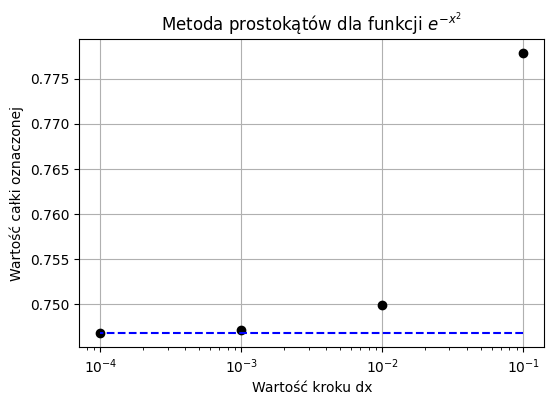

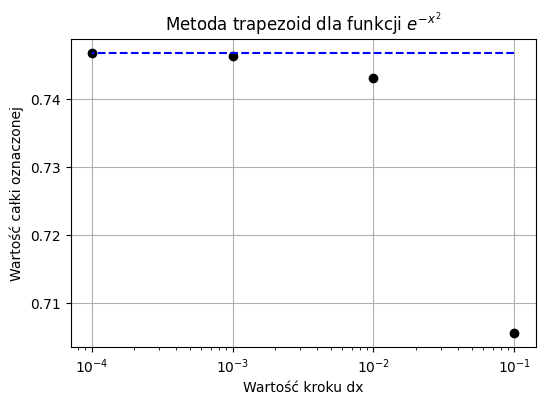

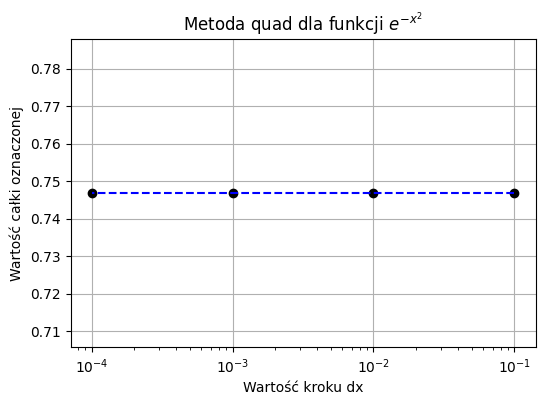

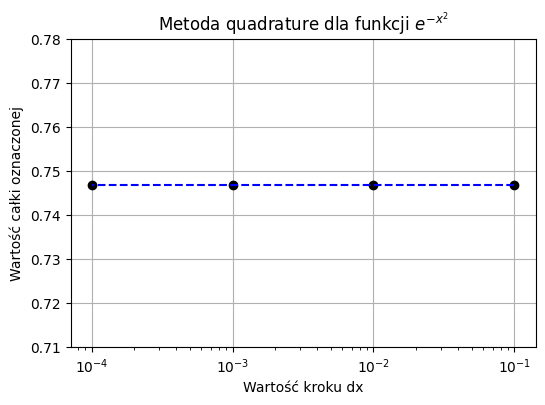

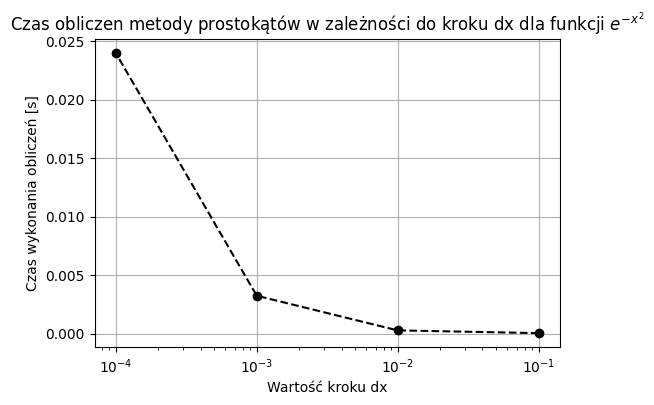

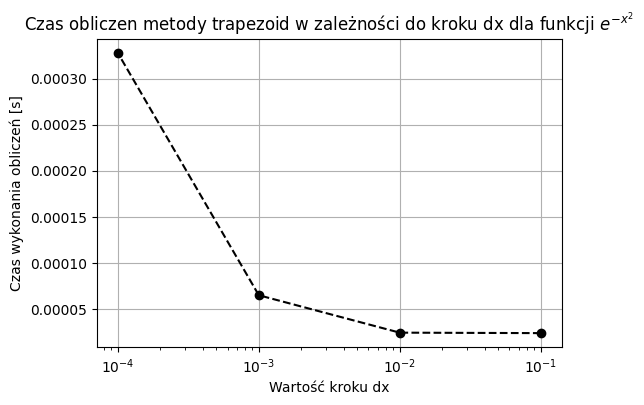

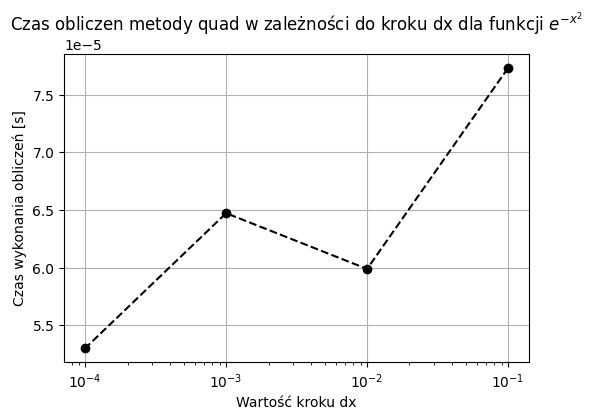

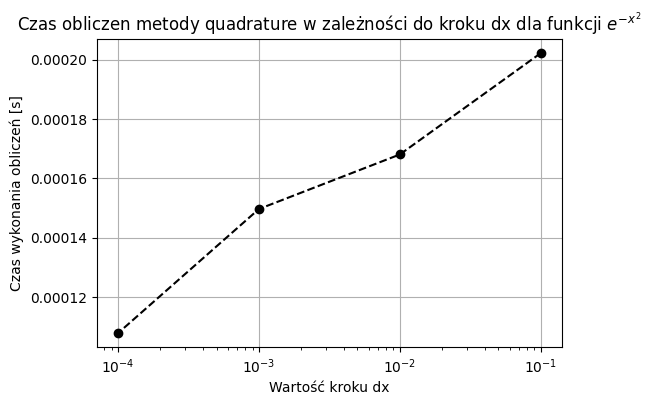

In [4]:
a = 0
b = 1
dx_vector = [10**-i for i in range(1, 5)]
f = lambda x: np.exp(-np.power(x, 2))

estimated_value, err = sp.integrate.quad(f, a, b)
estimated_values = [estimated_value for _ in range(len(dx_vector))]

results_rectangle = []
results_trapezoid = []
results_quad = []
results_quadrature = []

times_rectangle = []
times_trapezoid = []
times_quad = []
times_quadrature = []

for dx in dx_vector:

    domain = np.arange(a, b, dx)

    # metoda prostokatow
    time = %timeit -r 5 -n 5 -o -q rectangle_method(f, a, b, domain, dx)
    times_rectangle.append(time.average)
    result_rectangle = rectangle_method(f, a, b, domain, dx)
    results_rectangle.append(result_rectangle)

    # trapezoid
    time = %timeit -r 5 -n 5 -o -q sp.integrate.trapezoid(f(domain), x=domain, dx=dx)
    times_trapezoid.append(time.average)
    result_trapezoid = sp.integrate.trapezoid(f(domain), x=domain, dx=dx)
    results_trapezoid.append(result_trapezoid)

    # quad
    time = %timeit -r 5 -n 5 -o -q sp.integrate.quad(f, a, b)
    times_quad.append(time.average)
    result_quad, error_quad = sp.integrate.quad(f, a, b)
    results_quad.append(result_quad)

    # quadrature
    time = %timeit -r 5 -n 5 -o -q sp.integrate.quadrature(f, a, b, maxiter=5000)
    times_quadrature.append(time.average)
    result_quadrature, error_quadrature = sp.integrate.quadrature(f, a, b, maxiter=5000)
    results_quadrature.append(result_quadrature)
    
plt.figure(figsize=(6,4))
plt.plot(dx_vector, results_rectangle, 'ko')
plt.plot(dx_vector, estimated_values, 'b--')
plt.grid()
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Wartość całki oznaczonej')
plt.title('Metoda prostokątów dla funkcji $e^{-x^2}$')
plt.semilogx()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dx_vector, results_trapezoid, 'ko')
plt.plot(dx_vector, estimated_values, 'b--')
plt.grid()
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Wartość całki oznaczonej')
plt.title('Metoda trapezoid dla funkcji $e^{-x^2}$')
plt.semilogx()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dx_vector, results_quad, 'ko')
plt.plot(dx_vector, estimated_values, 'b--')
plt.grid()
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Wartość całki oznaczonej')
plt.title('Metoda quad dla funkcji $e^{-x^2}$')
plt.semilogx()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dx_vector, results_quadrature, 'ko')
plt.plot(dx_vector, estimated_values, 'b--')
plt.grid()
plt.ylim((0.71, 0.78))
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Wartość całki oznaczonej')
plt.title('Metoda quadrature dla funkcji $e^{-x^2}$')
plt.semilogx()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dx_vector, times_rectangle, 'ko--')
plt.grid()
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Czas wykonania obliczeń [s]')
plt.title('Czas obliczen metody prostokątów w zależności do kroku dx dla funkcji $e^{-x^2}$')
plt.semilogx()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dx_vector, times_trapezoid, 'ko--')
plt.grid()
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Czas wykonania obliczeń [s]')
plt.title('Czas obliczen metody trapezoid w zależności do kroku dx dla funkcji $e^{-x^2}$')
plt.semilogx()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dx_vector, times_quad, 'ko--')
plt.grid()
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Czas wykonania obliczeń [s]')
plt.title('Czas obliczen metody quad w zależności do kroku dx dla funkcji $e^{-x^2}$')
plt.semilogx()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dx_vector, times_quadrature, 'ko--')
plt.grid()
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Czas wykonania obliczeń [s]')
plt.title('Czas obliczen metody quadrature w zależności do kroku dx dla funkcji $e^{-x^2}$')
plt.semilogx()
plt.show()

***Zadanie 3.***  
Dla funkcji 

$$f(x) = x^{x}$$

wyznacz numerycznie wartośc całki na przedziale $a = 1$, $b=2$  w  taki sam sposób jak w zadaniu 1.

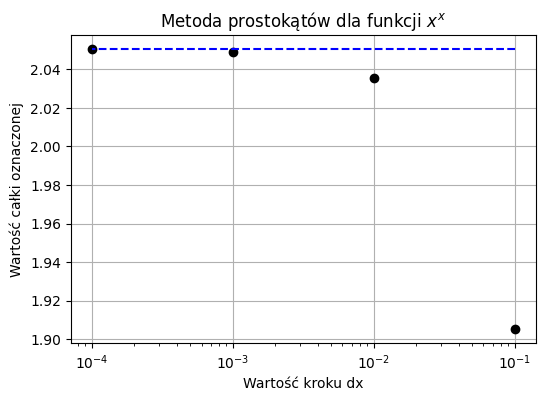

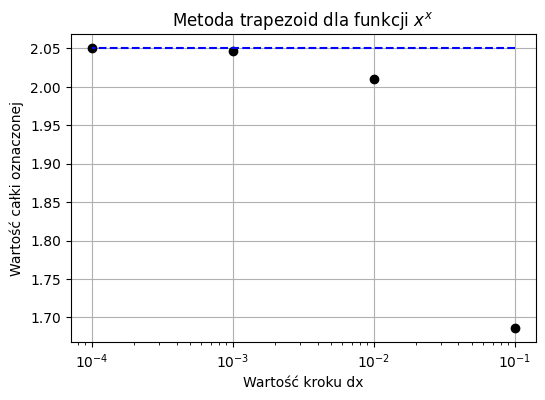

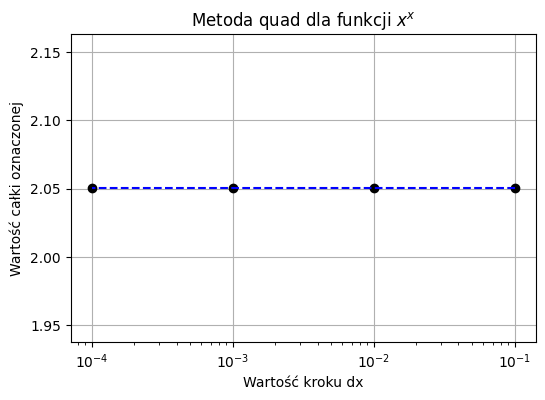

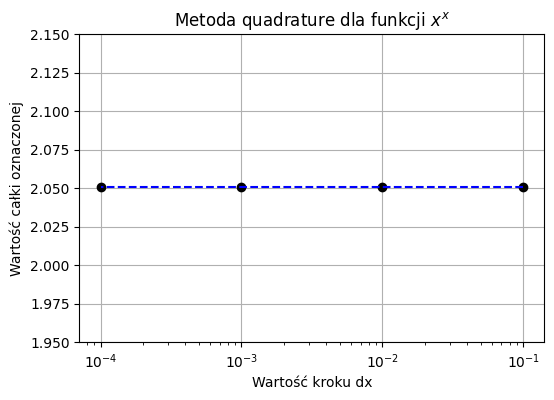

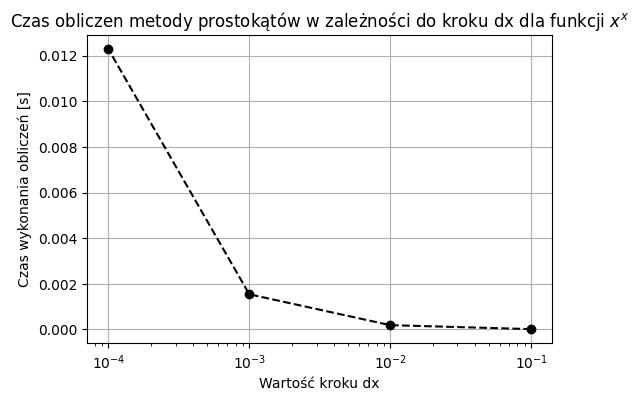

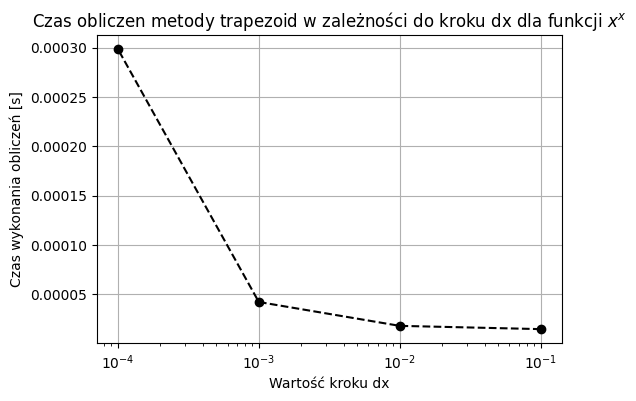

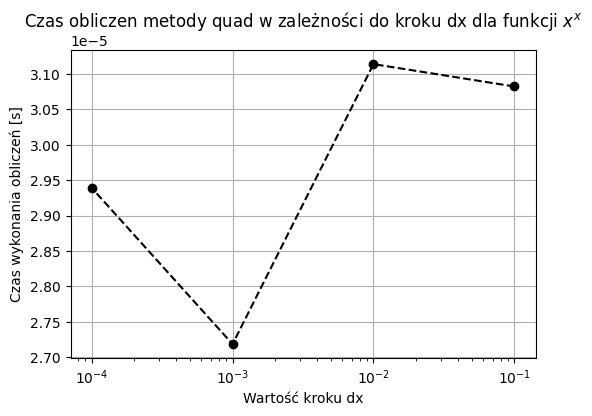

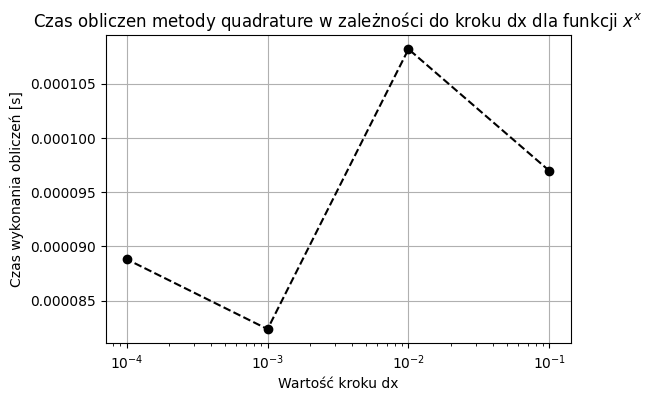

In [5]:
a = 1
b = 2
dx_vector = [10**-i for i in range(1, 5)]
f = lambda x: np.power(x, x)

estimated_value, err = sp.integrate.quad(f, a, b)
estimated_values = [estimated_value for _ in range(len(dx_vector))]

results_rectangle = []
results_trapezoid = []
results_quad = []
results_quadrature = []

times_rectangle = []
times_trapezoid = []
times_quad = []
times_quadrature = []

for dx in dx_vector:

    domain = np.arange(a, b, dx)

    # metoda prostokatow
    time = %timeit -r 5 -n 5 -o -q rectangle_method(f, a, b, domain, dx)
    times_rectangle.append(time.average)
    result_rectangle = rectangle_method(f, a, b, domain, dx)
    results_rectangle.append(result_rectangle)

    # trapezoid
    time = %timeit -r 5 -n 5 -o -q sp.integrate.trapezoid(f(domain), x=domain, dx=dx)
    times_trapezoid.append(time.average)
    result_trapezoid = sp.integrate.trapezoid(f(domain), x=domain, dx=dx)
    results_trapezoid.append(result_trapezoid)

    # quad
    time = %timeit -r 5 -n 5 -o -q sp.integrate.quad(f, a, b)
    times_quad.append(time.average)
    result_quad, error_quad = sp.integrate.quad(f, a, b)
    results_quad.append(result_quad)

    # quadrature
    time = %timeit -r 5 -n 5 -o -q sp.integrate.quadrature(f, a, b, maxiter=5000)
    times_quadrature.append(time.average)
    result_quadrature, error_quadrature = sp.integrate.quadrature(f, a, b, maxiter=5000)
    results_quadrature.append(result_quadrature)
    
plt.figure(figsize=(6,4))
plt.plot(dx_vector, results_rectangle, 'ko')
plt.plot(dx_vector, estimated_values, 'b--')
plt.grid()
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Wartość całki oznaczonej')
plt.title('Metoda prostokątów dla funkcji $x^x$')
plt.semilogx()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dx_vector, results_trapezoid, 'ko')
plt.plot(dx_vector, estimated_values, 'b--')
plt.grid()
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Wartość całki oznaczonej')
plt.title('Metoda trapezoid dla funkcji $x^x$')
plt.semilogx()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dx_vector, results_quad, 'ko')
plt.plot(dx_vector, estimated_values, 'b--')
plt.grid()
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Wartość całki oznaczonej')
plt.title('Metoda quad dla funkcji $x^x$')
plt.semilogx()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dx_vector, results_quadrature, 'ko')
plt.plot(dx_vector, estimated_values, 'b--')
plt.grid()
plt.ylim((1.95, 2.15))
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Wartość całki oznaczonej')
plt.title('Metoda quadrature dla funkcji $x^x$')
plt.semilogx()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dx_vector, times_rectangle, 'ko--')
plt.grid()
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Czas wykonania obliczeń [s]')
plt.title('Czas obliczen metody prostokątów w zależności do kroku dx dla funkcji $x^x$')
plt.semilogx()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dx_vector, times_trapezoid, 'ko--')
plt.grid()
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Czas wykonania obliczeń [s]')
plt.title('Czas obliczen metody trapezoid w zależności do kroku dx dla funkcji $x^x$')
plt.semilogx()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dx_vector, times_quad, 'ko--')
plt.grid()
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Czas wykonania obliczeń [s]')
plt.title('Czas obliczen metody quad w zależności do kroku dx dla funkcji $x^x$')
plt.semilogx()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dx_vector, times_quadrature, 'ko--')
plt.grid()
plt.xlabel(xlabel='Wartość kroku dx')
plt.ylabel(ylabel='Czas wykonania obliczeń [s]')
plt.title('Czas obliczen metody quadrature w zależności do kroku dx dla funkcji $x^x$')
plt.semilogx()
plt.show()

Wnioski: Najlepszą metodą okazała się metoda quad. Dostosowuje ona krok w zależności od przebiegu zmienności funkcji. Dzięki temu gwarantuje dużą dokładność i zadowalający czas wykonywania. Metody prostokątów oraz trapezów są równie dobre pod warunkiem wybrania dostatecznie małego kroku. Odbywa się to jednak kosztem czasu wykonywania obliczeń.